Task 1: There are a few different aesthetics being used in this graph. The x-axis shows "Income" on a logarithmic scale, while the y-axis displays "Life Expectancy" in years. The colors represent different regions of the world, and the size of each point corresponds to the population. 

/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


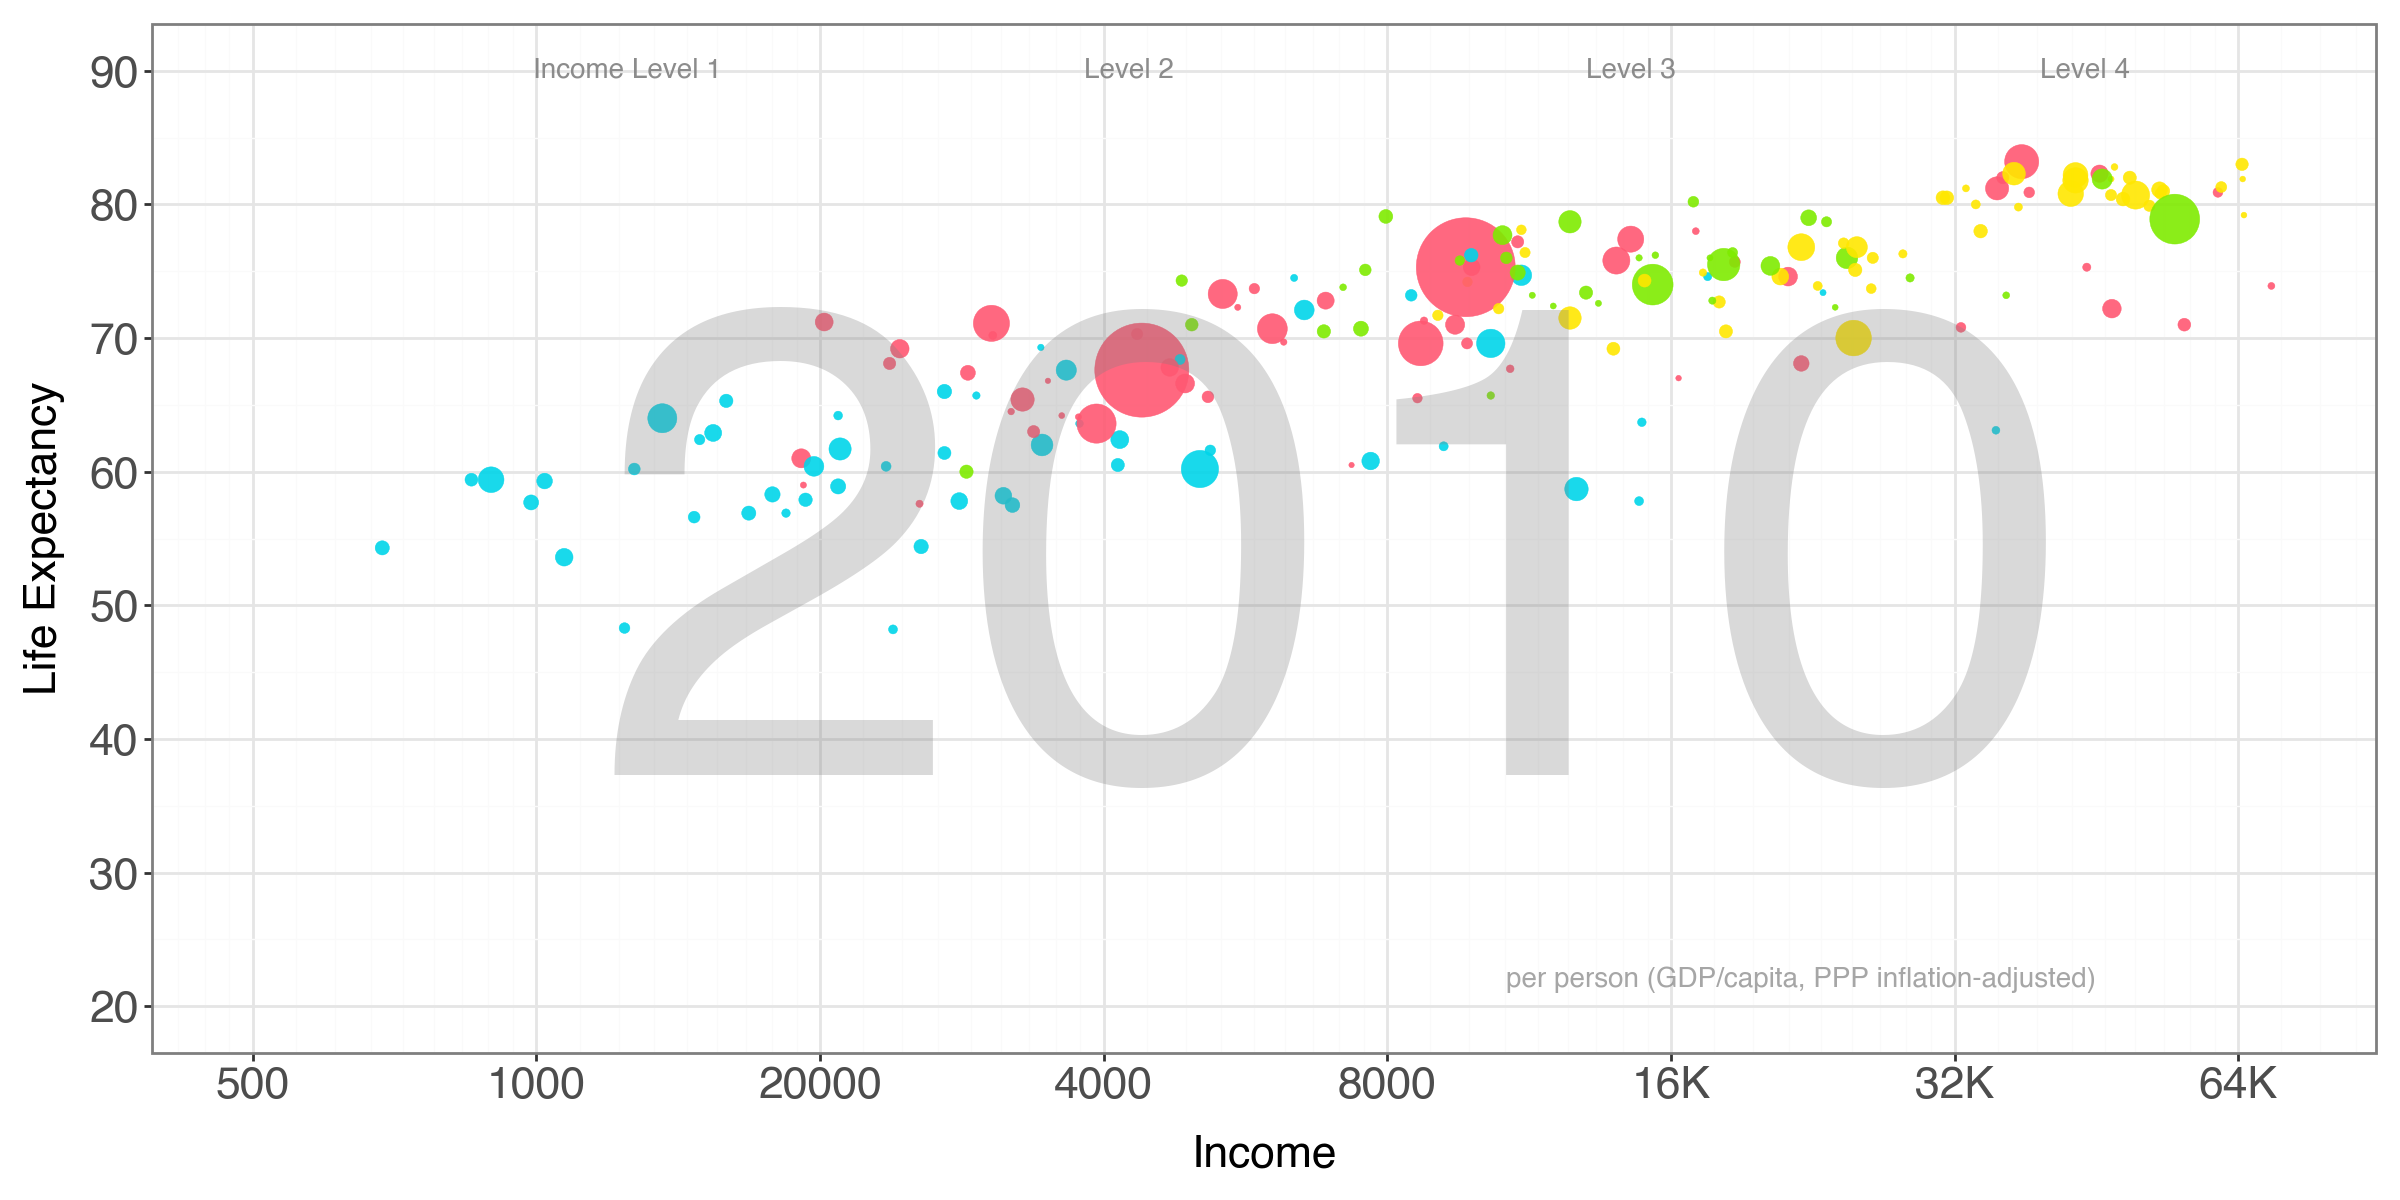

In [280]:
#Task 1
import plotnine as p9
import pandas as pd

q1data = pd.read_csv('Data/q1data.csv')
q1data = q1data.dropna()

custom_colors = {
    'asia': '#ff5872',    # Hot Pink
    'europe': '#ffe700',  # Yellow
    'africa': '#00d5e9',  # Light Blue
    'americas': '#7feb00' # Light Green
}

custom_labels = ['500', '1000', '20000', '4000', '8000', '16K', '32K', '64K']

(p9.ggplot(data=q1data,
    mapping=p9.aes(x='income', y='life_exp', color='four_regions', size='population'))
    + p9.geom_point(alpha=0.9, stroke=0.1)
    + p9.scale_x_log10(breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000], 
                       limits=[500, 70000], 
                       labels=custom_labels)  # Use custom labels for the x-axis
    + p9.xlab('Income')
    + p9.ylab('Life Expectancy')
    + p9.scale_y_continuous(breaks=range(20, 100, 10), limits=[20, 90])
    + p9.scale_size(range=[1, 20], guide=p9.guide_legend(title='population'))
    + p9.scale_color_manual(values=custom_colors)  
    + p9.theme_bw()
    + p9.theme(text=p9.element_text(size=16),
               axis_title_x=p9.element_text(margin={'t': 10}), #ChatGPT - Helped with spacing on the X-axis
               figure_size=(12, 6))
    + p9.theme(legend_position='none')  
    + p9.annotate('text', x=22000, y=22, label='per person (GDP/capita, PPP inflation-adjusted)', size=10, color='gray', alpha=0.7)
    + p9.annotate('text', x=7000, y=50, label='2010', size=240, color='gray', alpha=0.3)
    # Income labels
    + p9.annotate('text', x=1250, y=90, label='Income Level 1', size=10, color='gray', alpha=0.9)
    + p9.annotate('text', x=4250, y=90, label='Level 2', size=10, color='gray', alpha=0.9)
    + p9.annotate('text', x=14500, y=90, label='Level 3', size=10, color='gray', alpha=0.9)
    + p9.annotate('text', x=44000, y=90, label='Level 4', size=10, color='gray', alpha=0.9)
)


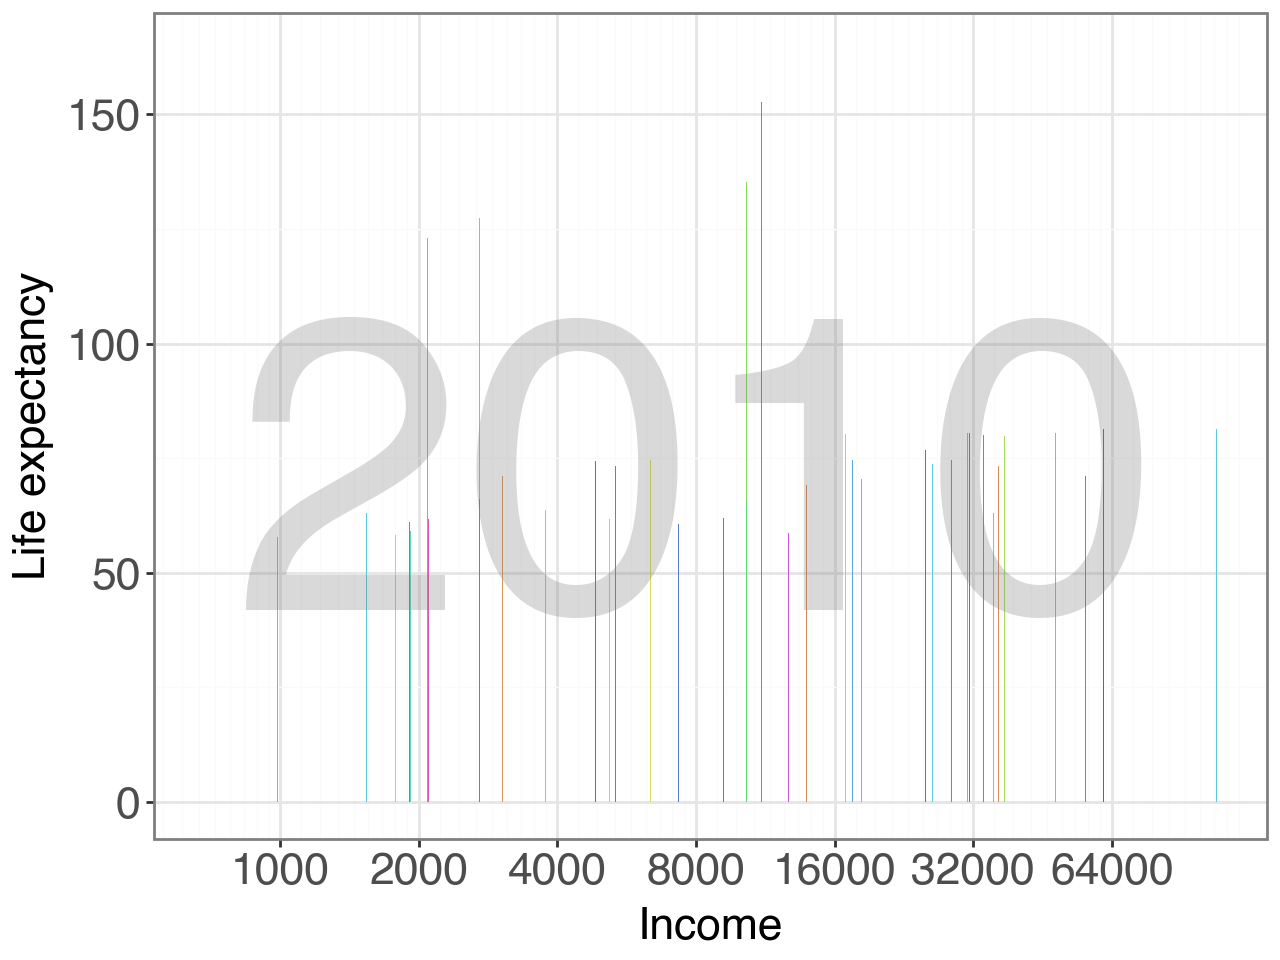

In [281]:
#Alternative  - Task 1 (geom_bar)
(p9.ggplot(data=q1data,
    mapping = p9.aes(x = 'income', y = 'life_exp', fill = 'country'))  
        + p9.geom_bar(stat='identity')  
        + p9.scale_x_log10(breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]) #Breaks/labels
        + p9.xlab('Income')
        + p9.ylab('Life expectancy')
        + p9.theme_bw()
        + p9.theme(text=p9.element_text(size=16))
        + p9.theme(legend_position='none')
        + p9.annotate('text', x=8000, y=65, label='2010', size=150, color='gray', alpha=0.3)  
)

Using geom_bar is not good here because both axes (income and life expectancy) represent continuous data/variables. Bar plots are best for categorical data, while a scatter plot, like geom_point in part 1, would be better for visualzing the relationship between these continuous variables.

Task 2: The x-axis represents exports as a percentage of GDP, and the y-axis represenrs imports as a percentage of GDP. Color is used to distinguish world regions. The size of each bubble corresponds to energy use. Finally, th

/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 35 rows containing missing values.


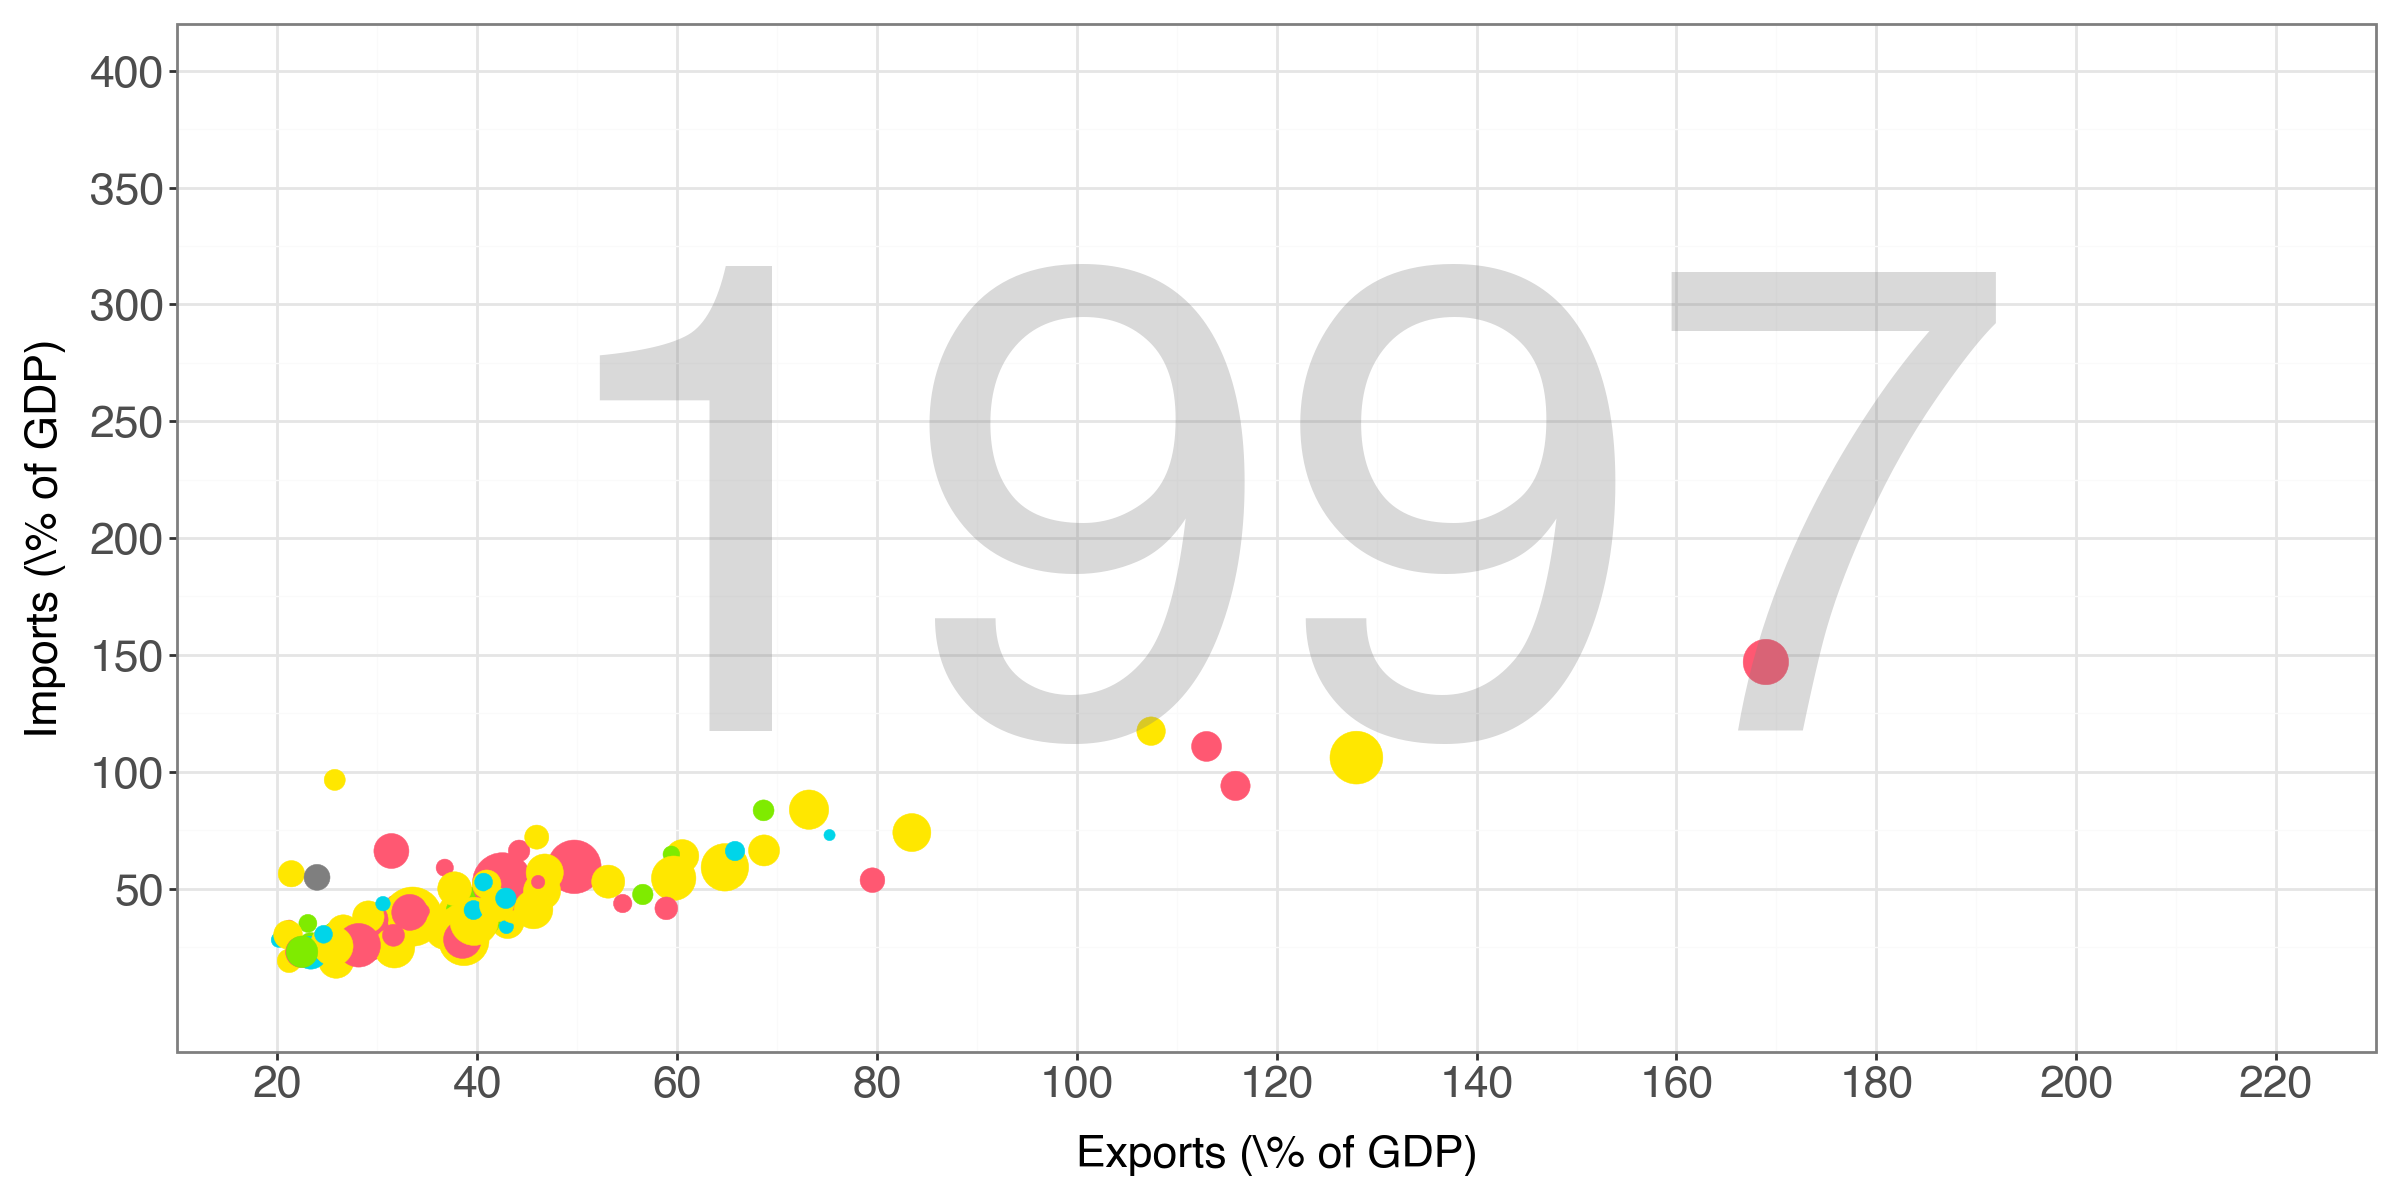

In [282]:
#Task 2
import plotnine as p9
import pandas as pd

q2data = pd.read_csv('Data/q2data.csv')

q2data = q2data.dropna(subset=['exports', 'imports', 'energy'])

q2data['energy'] = pd.to_numeric(q2data['energy'], errors='coerce') #ChatGPT - This line converts the values in the energy column of the q2data DataFrame to numeric (integer or float) format.


custom_colors = {
    'asia': '#ff5872',    # Hot Pink
    'europe': '#ffe700',  # Yellow
    'africa': '#00d5e9',  # Light Blue
    'americas': '#7feb00' # Light Green
}

(p9.ggplot(data=q2data,
    mapping=p9.aes(x='exports', y='imports', color='four_regions', size='energy'))
    + p9.geom_point(alpha=1.0, stroke = 0.1, position=p9.position_jitter(width=2, height=2))
    + p9.xlab('Exports (\% of GDP)')
    + p9.ylab('Imports (\% of GDP)')
    + p9.scale_x_continuous(breaks=range(20, 241, 20), limits=[20, 220])
    + p9.scale_y_continuous(breaks=range(50, 401, 50), limits=[0, 400])
    + p9.scale_size(range=[1, 12], guide=None)  
    + p9.scale_color_manual(values=custom_colors)  
    + p9.theme_bw()
    + p9.theme(text=p9.element_text(size=16),
               axis_title_x=p9.element_text(margin={'t': 10}),
               figure_size=(12, 6))
    + p9.theme(legend_position='none')  
    + p9.annotate('text', x=120, y=190, label='1997', size=240, color='gray', alpha=0.3)
)

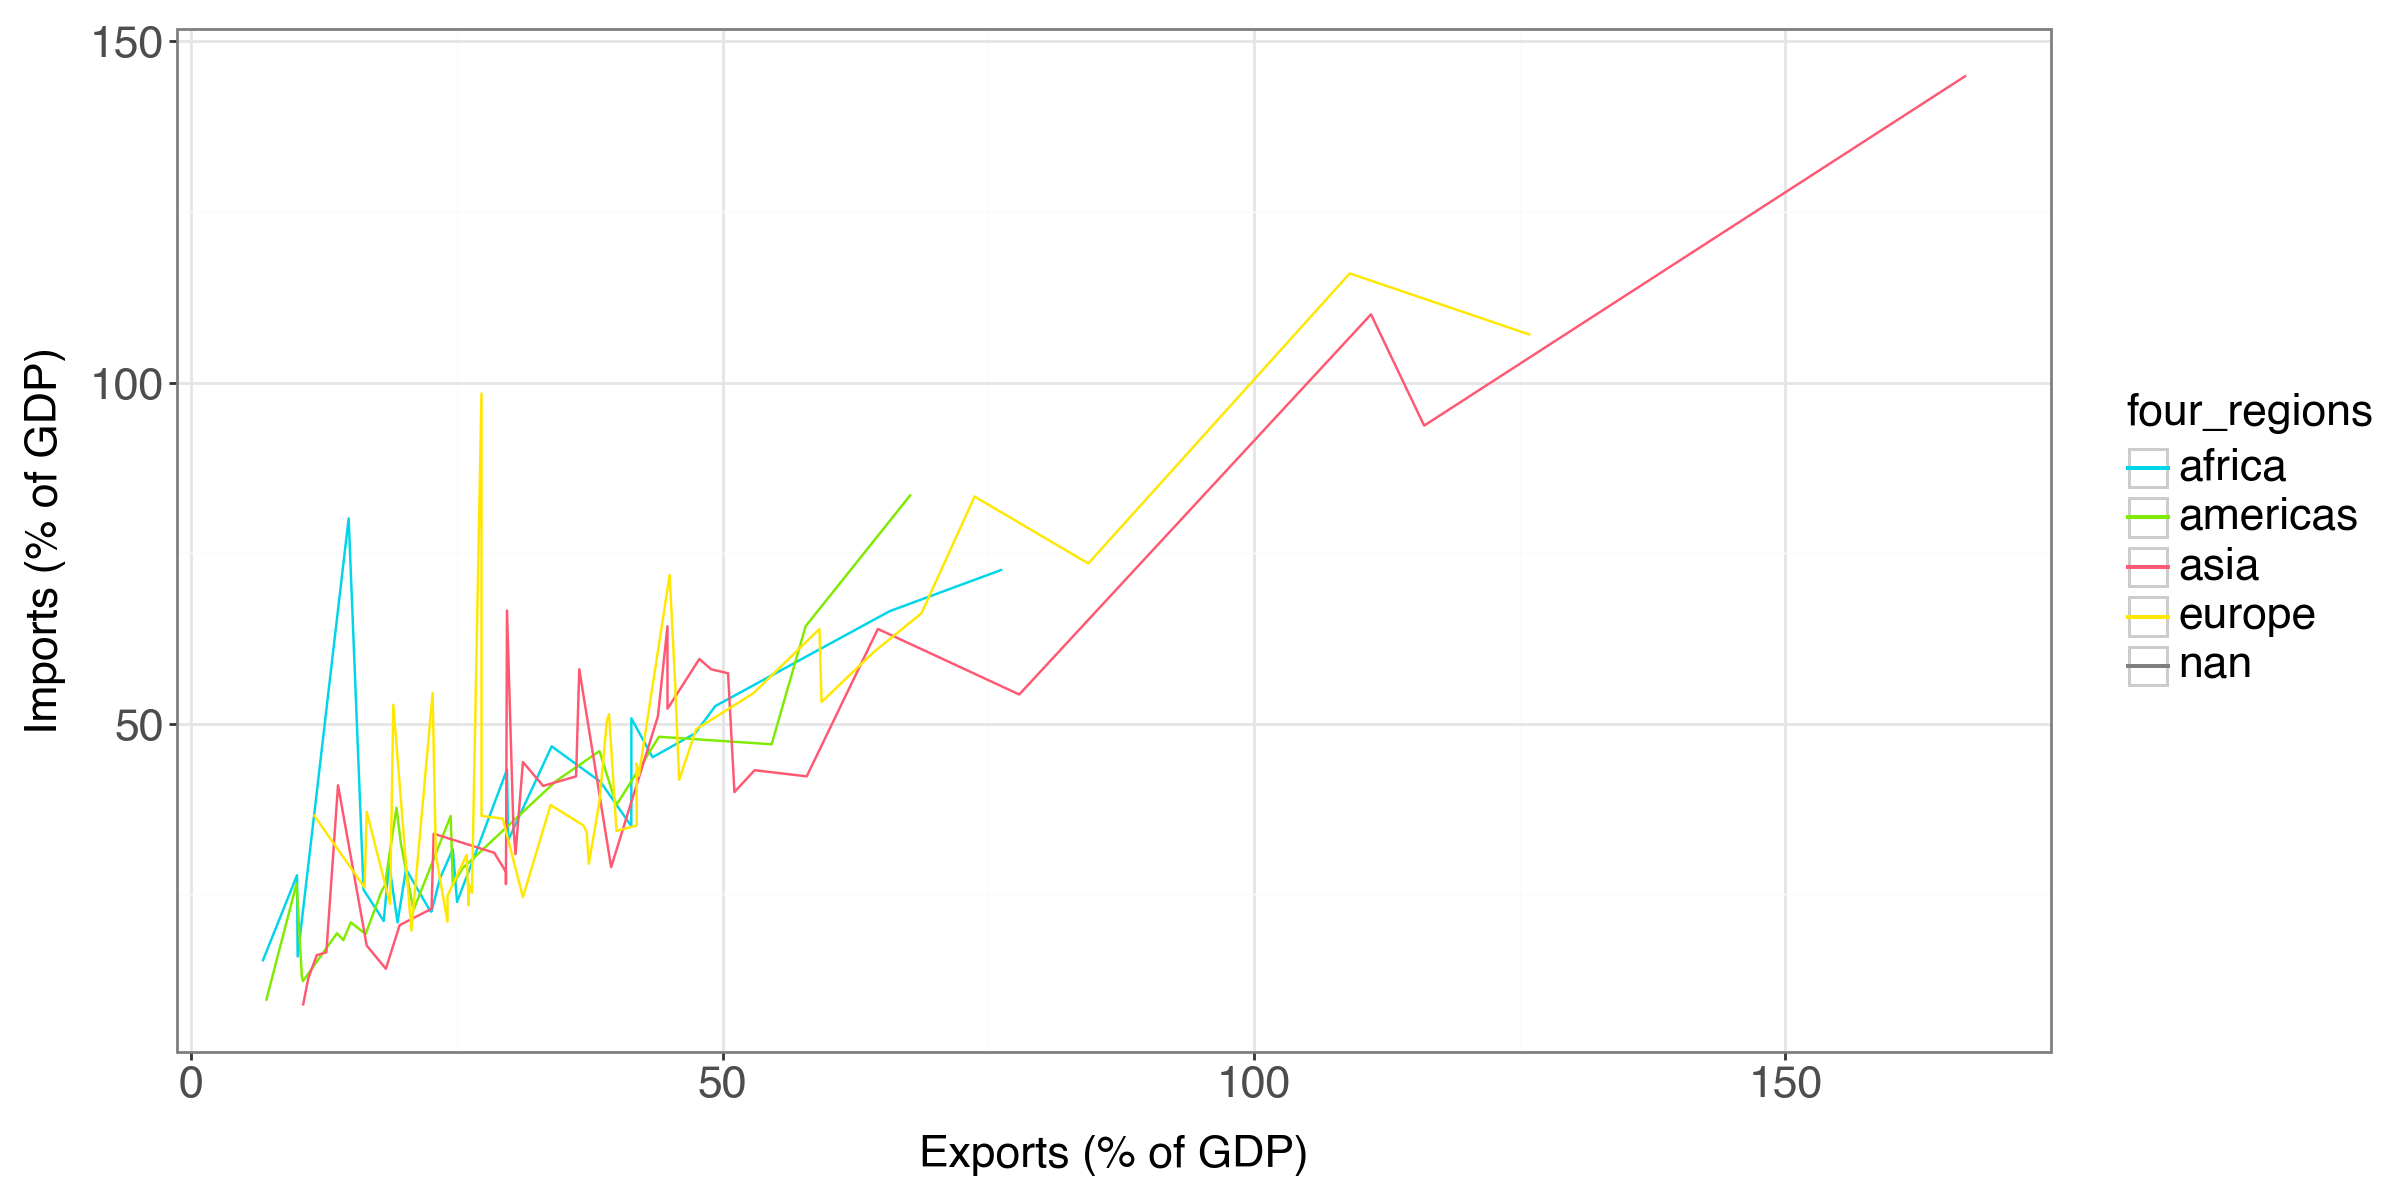

In [283]:
#Alternative - Task 2 (geom_line)
import plotnine as p9
import pandas as pd

q2data = pd.read_csv('Data/q2data.csv')

q2data = q2data.dropna(subset=['exports', 'imports', 'energy'])

q2data['energy'] = pd.to_numeric(q2data['energy'], errors='coerce') 

customColors = {
    'asia': '#ff5872',    # Hot Pink
    'europe': '#ffe700',  # Yellow
    'africa': '#00d5e9',  # Light Blue
    'americas': '#7feb00' # Light Green
}

# Create a plot using geom_line instead of geom_point
linePlot = (
    p9.ggplot(data=q2data, mapping=p9.aes(x='exports', y='imports', color='four_regions', group='four_regions')) 
    + p9.geom_line() 
    + p9.xlab('Exports (% of GDP)')
    + p9.ylab('Imports (% of GDP)')
    + p9.scale_color_manual(values=customColors)
    + p9.theme_bw()
    + p9.theme(text=p9.element_text(size=16),
               axis_title_x=p9.element_text(margin={'t': 10}),
               figure_size=(12, 6))
)

linePlot


The geom_line is not a good fit here, because it connects data points with lines, but since our data isn 't sequential, the lines it creates are choatic and don't represent anything meaningful. For that reason, like in task 1, geom_point is a better alternative to using geom_line. 

Task 3: The x-axis represents the percentage of individuals using the internet, and the y-axis shows GDP per capita, adjusted for inflation. The color is mapped to world regions, and the size of the bubbles reflects income levels.

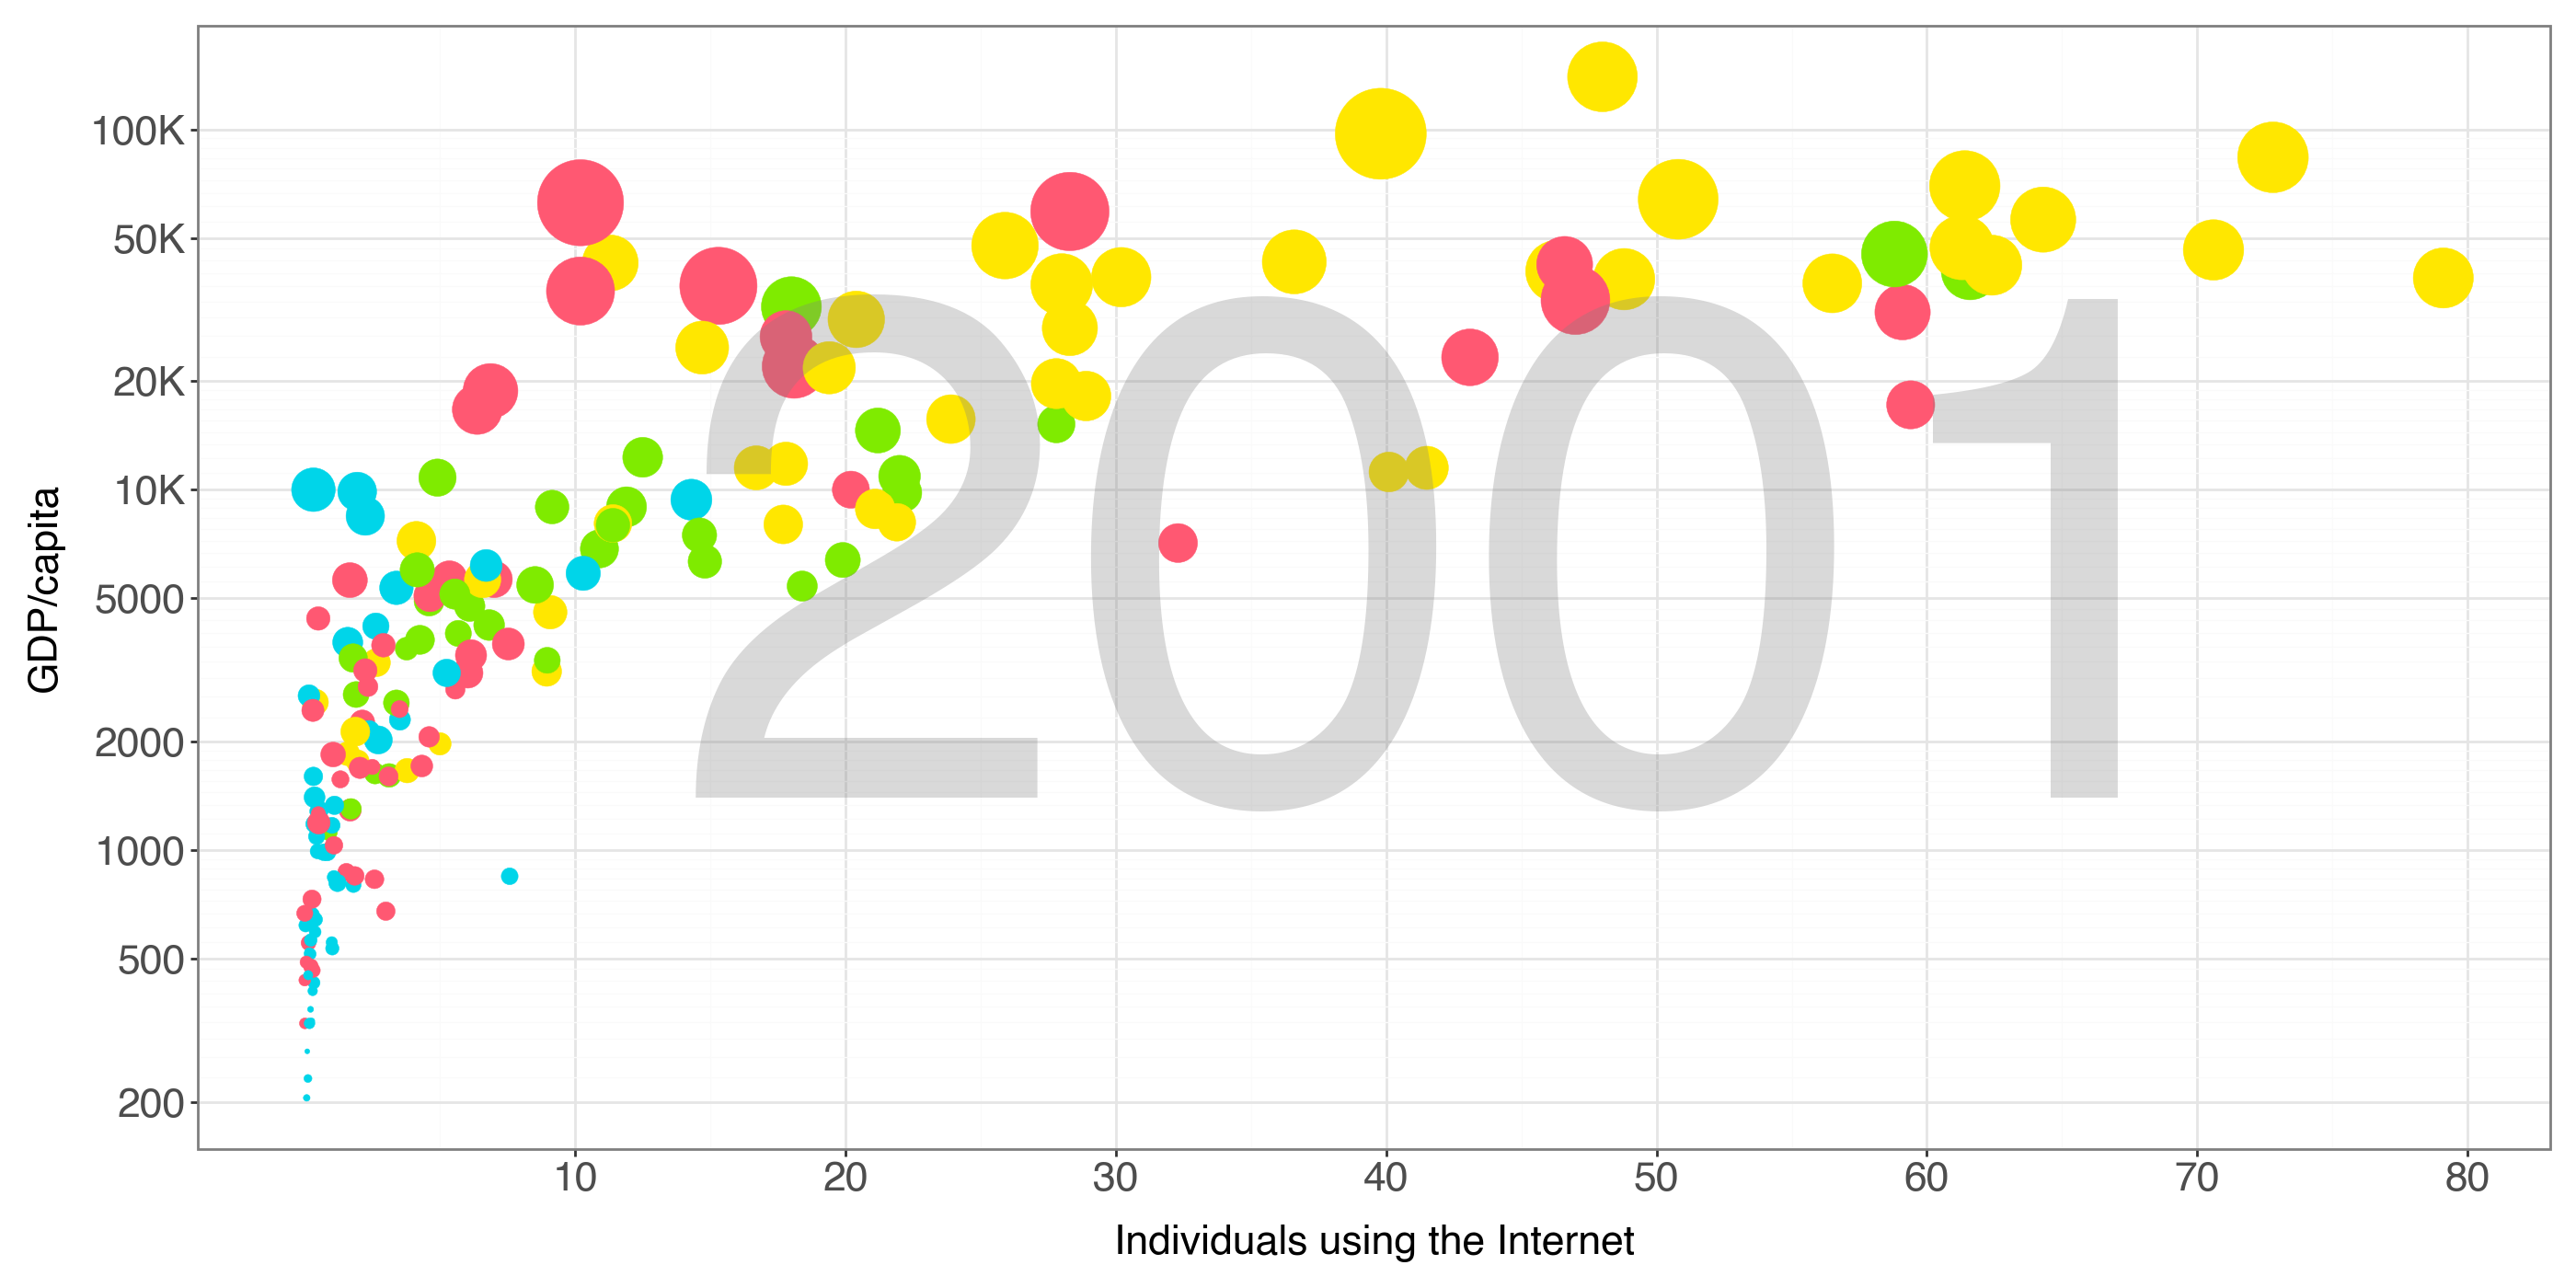

In [284]:
#Task 3
%matplotlib inline
import plotnine as p9
import pandas as pd

q3data = pd.read_csv('Data/q3data.csv')
q3data = q3data.dropna()

custom_colors = {
    'asia': '#ff5872',    # Hot Pink
    'europe': '#ffe700',  # Yellow
    'africa': '#00d5e9',  # Light Blue
    'americas': '#7feb00' # Light Green
}

custom_labels = ['200', '500', '1000', '2000', '5000', '10K', '20K', '50K', '100K']

(p9.ggplot(data=q3data,
    mapping = p9.aes(x = 'internet_users', y = 'gdp', color = 'four_regions', size = 'income'))
        + p9.geom_point(alpha = 1.0, stroke = 0.1)
        + p9.xlab('Individuals using the Internet')
        + p9.ylab('GDP/capita')
        + p9.scale_x_continuous(breaks=range(10, 100, 10))  
        + p9.scale_y_log10(breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000], labels = custom_labels) 
        + p9.scale_size(range=[1, 20])
        + p9.scale_color_manual(values=custom_colors)  
        + p9.theme_bw()
        + p9.theme(text=p9.element_text(size=16),                    
                   figure_size=(14, 7))  
        + p9.theme(legend_position='none')
        + p9.annotate('text', x=43, y=4500, label='2001', size=280, color='gray', alpha=0.3)  
    )

/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/mizani/transforms.py:350: RuntimeWarning: overflow encountered in power


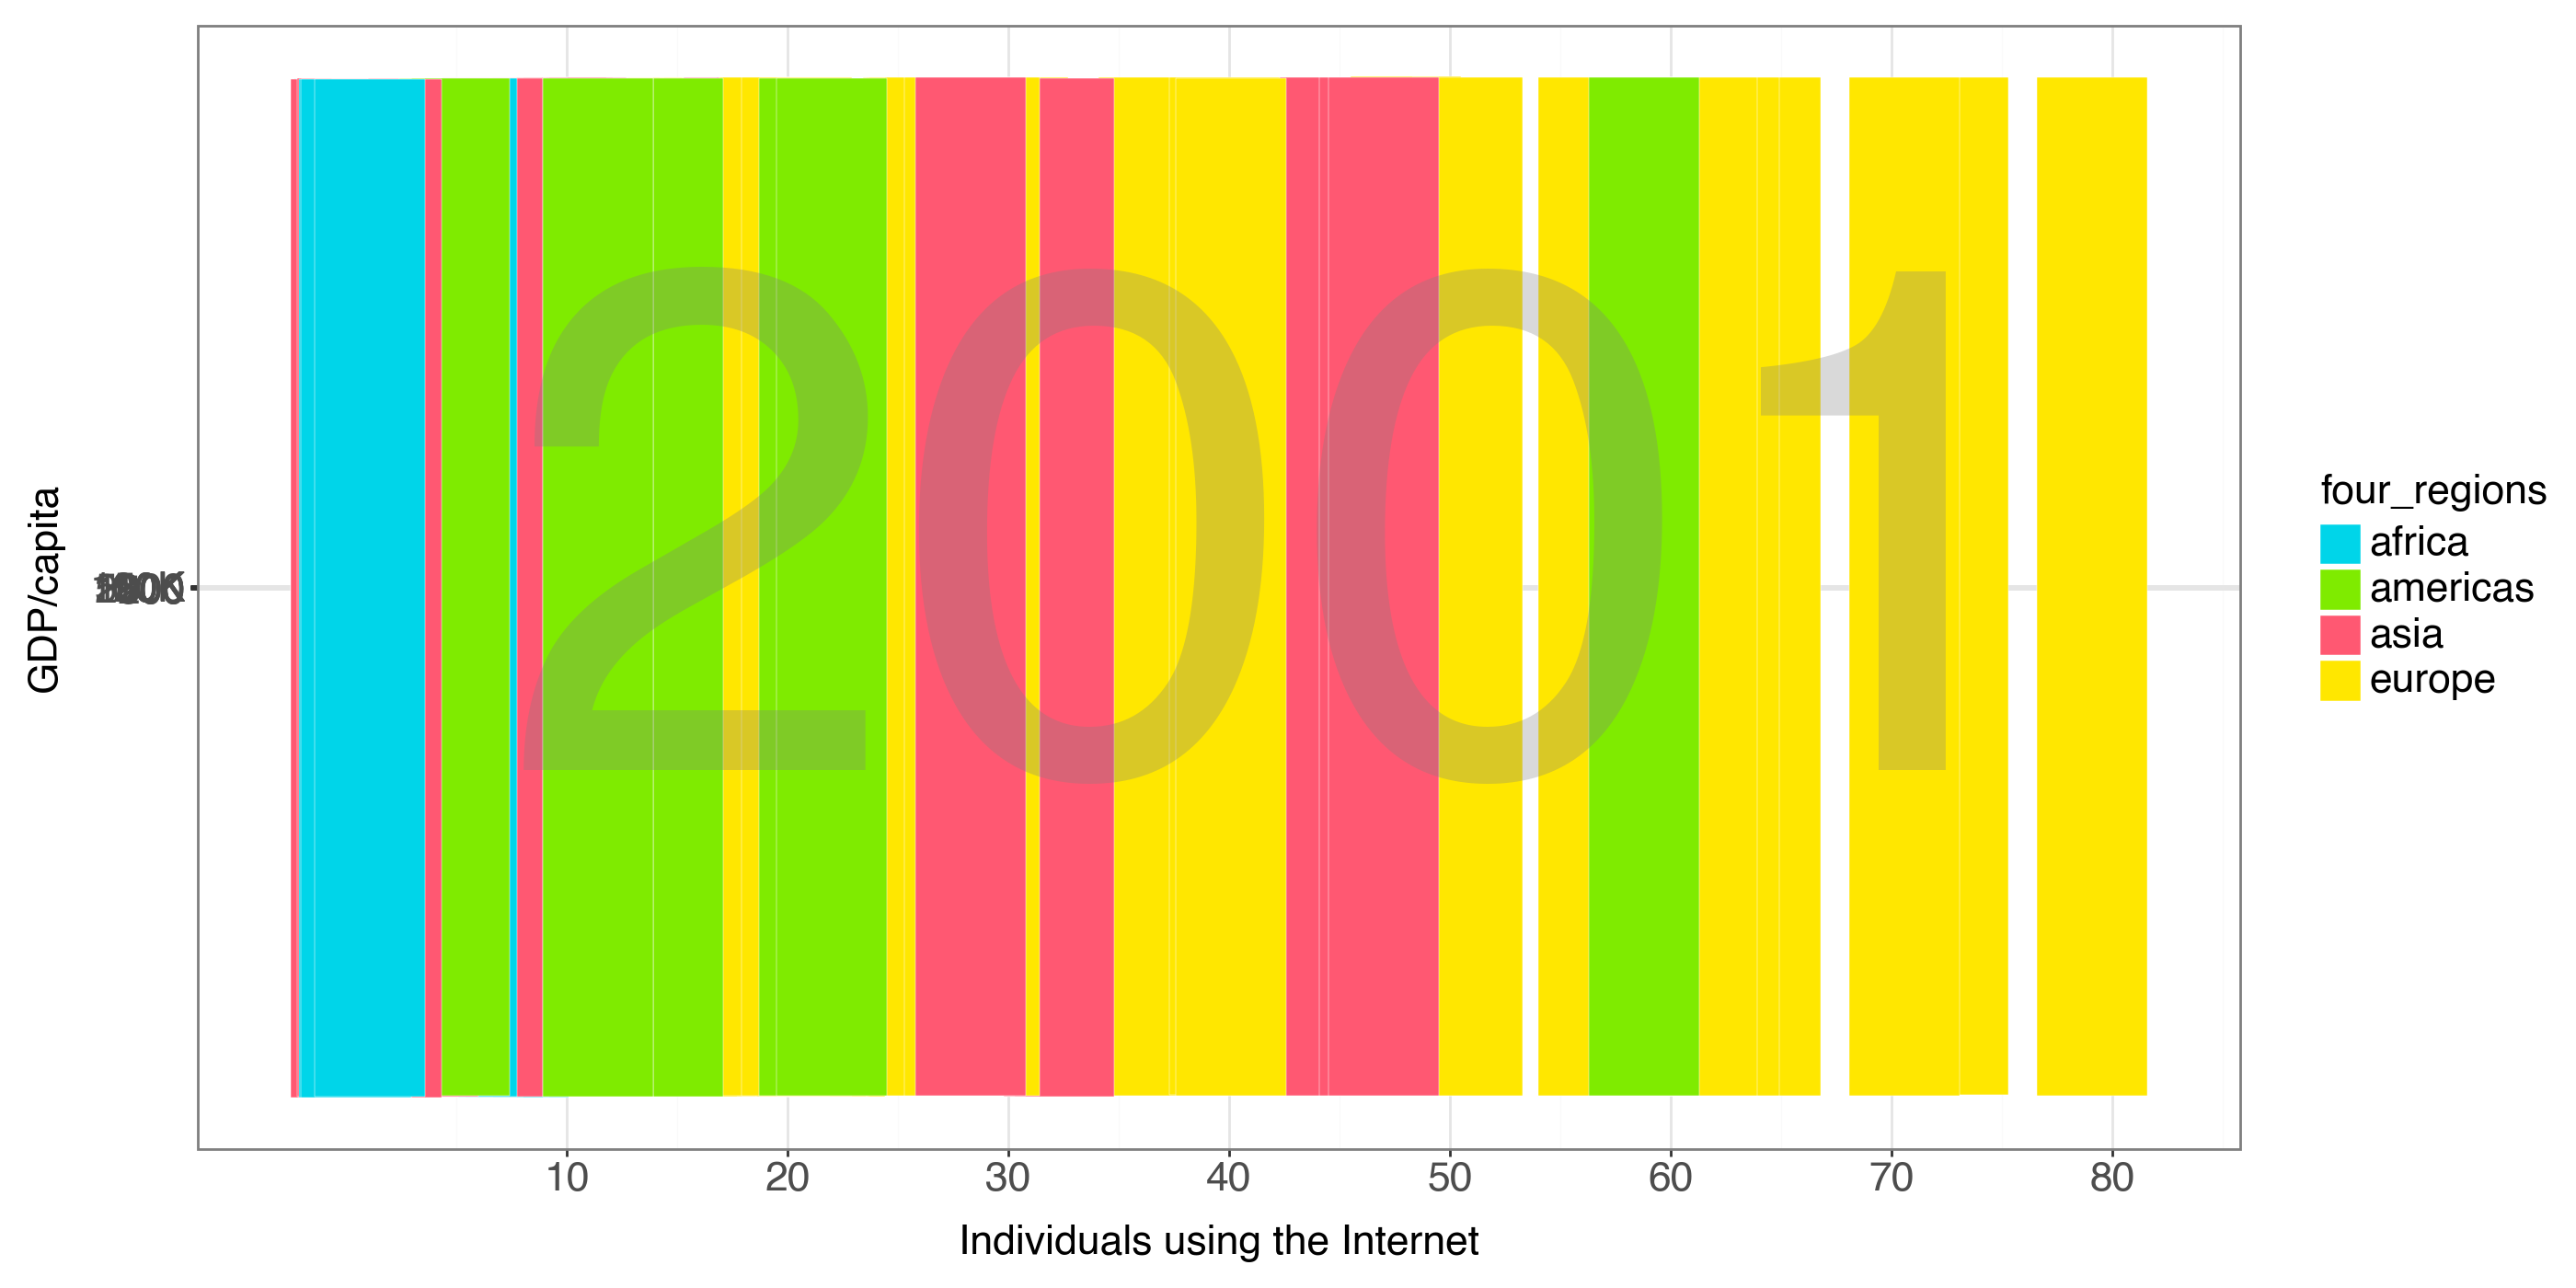

In [285]:
#Alternative - Task 3 (geom_tile)
%matplotlib inline
import plotnine as p9
import pandas as pd

q3data = pd.read_csv('Data/q3data.csv')
q3data = q3data.dropna()

custom_colors = {
    'asia': '#ff5872',    # Hot Pink
    'europe': '#ffe700',  # Yellow
    'africa': '#00d5e9',  # Light Blue
    'americas': '#7feb00' # Light Green
}

custom_labels = ['200', '500', '1000', '2000', '5000', '10K', '20K', '50K', '100K']

heatmap_plot = (
    p9.ggplot(data=q3data,
              mapping=p9.aes(x='internet_users', y='gdp', fill='four_regions')) 
    + p9.geom_tile(p9.aes(width=5, height=1000), color="white", size=0.1)
    + p9.xlab('Individuals using the Internet')
    + p9.ylab('GDP/capita')
    + p9.scale_x_continuous(breaks=range(10, 100, 10))  
    + p9.scale_y_log10(breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000], labels=custom_labels) 
    + p9.scale_fill_manual(values=custom_colors)
    + p9.theme_bw()
    + p9.theme(text=p9.element_text(size=16),
               figure_size=(14, 7))  
    + p9.annotate('text', x=43, y=4500, label='2001', size=280, color='gray', alpha=0.3)
)

heatmap_plot

Geom_tile is not a goodfit here, becuase its typically used for categorical/binned data, and not individual points, like we have here. The graph is very hard to interpret and doesn't show anything meaningful. Like in the other 2 tasks, geom_point is a much better fot for this data set. 